miRNAによって発現が減少した遺伝子を選出

In [1]:
import pandas as pd
import math

In [2]:
miRNA_A=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/phase2/miRNA/miRNA_GSE21992_mir1.csv")
miRNA_B=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/phase2/miRNA/miRNA_GSE21992_mir155.csv")

In [3]:
print(miRNA_A.head(10))
print(miRNA_B.head(10))

  RefseqAccession  logfold_TE
0       NM_017847    0.481595
1       NM_014739   -0.042241
2       NM_017845   -0.380195
3       NM_001514    0.013736
4       NM_004035    0.304400
5       NM_030571    0.317635
6       NM_002850   -0.418844
7       NM_004423   -0.180786
8       NM_002737   -0.146900
9       NM_002731    0.055162
  RefseqAccession  logfold_TE
0       NM_018983   -0.916903
1       NM_001516    0.719935
2       NM_004741   -0.160011
3    NM_001024847    0.113948
4       NM_004035    0.275800
5       NM_002853   -0.182113
6       NM_012262   -1.082952
7       NM_016081   -0.508333
8       NM_012464   -0.021937
9       NM_006830    0.031418


In [4]:
merge=pd.merge(miRNA_A, miRNA_B, on='RefseqAccession', how='inner')
merge

,RefseqAccession,logfold_TE_x,logfold_TE_y
0,NM_014739,-0.042241,-0.192367
1,NM_004035,0.304400,0.275800
2,NM_030571,0.317635,0.175314
3,NM_016081,-0.489379,-0.508333
4,NM_024656,-0.286626,0.138758
5,NM_001142568,0.027837,0.108744
6,NM_001144967,0.495809,-0.184145
7,NM_032270,-0.916742,-0.395971
8,NM_147188,-0.152321,0.280455
9,NM_001146110,0.267697,0.319941


In [15]:
A=miRNA_A[miRNA_A.logfold_TE<math.log2(0.33)]
A.to_csv("1_2_mir1_decrease.csv",index=False)
len(A)

8

In [16]:
B=miRNA_B[miRNA_B.logfold_TE<math.log2(0.33)]
B.to_csv("1_2_mir155_decrease.csv",index=False)
len(B)

2

In [17]:
merge=pd.merge(A, B, on='RefseqAccession', how='inner')
merge.to_csv("Both_target.csv",index=False)
len(merge)

0

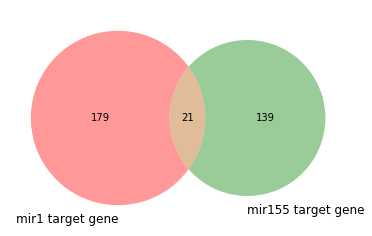

In [47]:
from matplotlib import pyplot
from matplotlib_venn import venn2
venn2(subsets = (len(A)-len(merge), len(B)-len(merge), len(merge)), set_labels = ('mir1 target gene', 'mir155 target gene'))
pyplot.savefig("miRNA_target.png")
pyplot.show()